<a href="https://colab.research.google.com/github/Ranya-Alghamdi-1/T5/blob/main/Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [6]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/T5/WEEK 4/4- Deep learning/1- Weekly_Project-20240818T044839Z-001/1- Weekly_Project/Weekly_Project/Bus_Breakdown_and_Delays.csv')

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [5]:
# Check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [6]:
# Summary statistics
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


<Axes: xlabel='Breakdown_or_Running_Late', ylabel='count'>

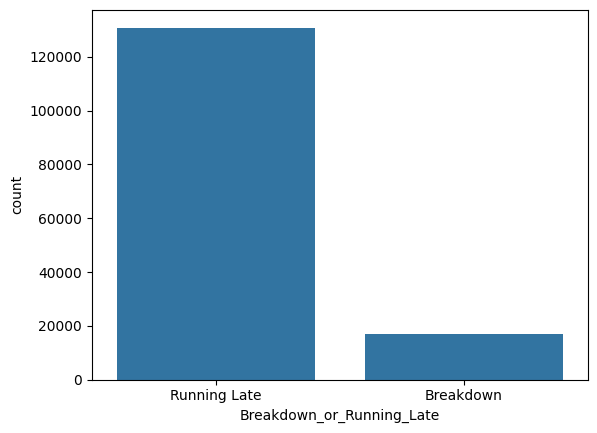

In [7]:
# Distribution of the target variable
sns.countplot(x='Breakdown_or_Running_Late', data=df)

In [8]:
df['Breakdown_or_Running_Late'].value_counts()

,count
Breakdown_or_Running_Late,
Running Late,130857
Breakdown,17115


<Axes: xlabel='Breakdown_or_Running_Late'>

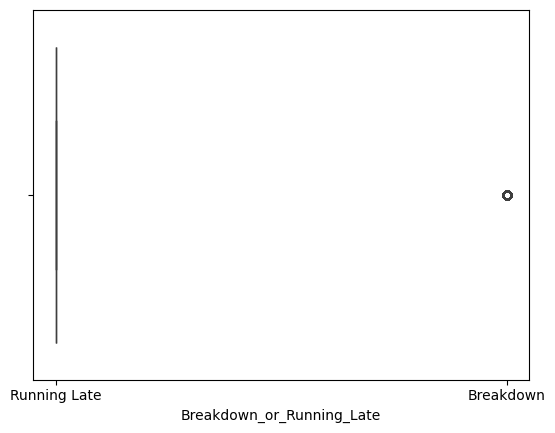

In [9]:
sns.boxplot(x='Breakdown_or_Running_Late', data=df) #To check the outliers

In [10]:
df.duplicated().sum()

0

In [11]:
#print the number of catogry col
df.catogricl_col = df.select_dtypes(include=['object']).columns
print(df.catogricl_col)

Index(['School_Year', 'Run_Type', 'Bus_No', 'Route_Number', 'Reason',
       'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')


<ipython-input-11-1cbb4c1b1342>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.catogricl_col = df.select_dtypes(include=['object']).columns


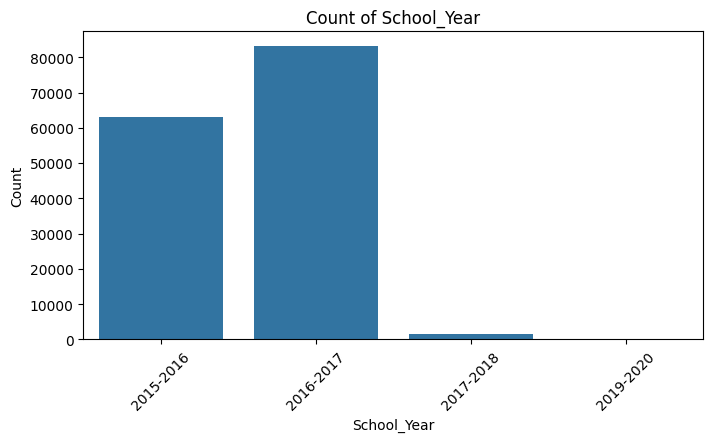

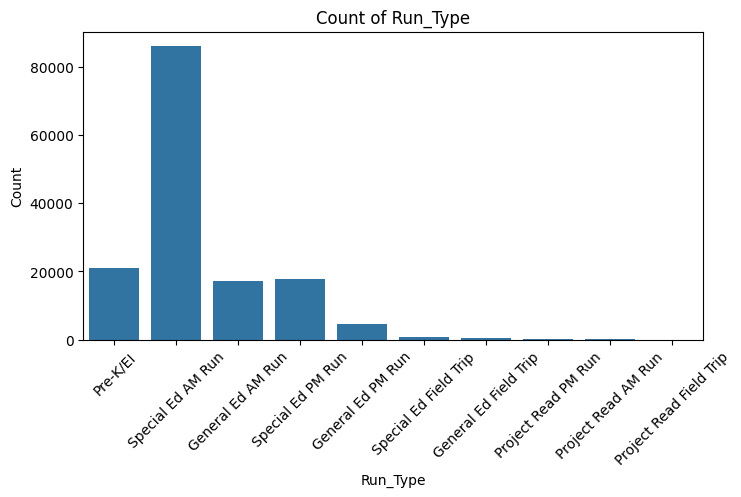

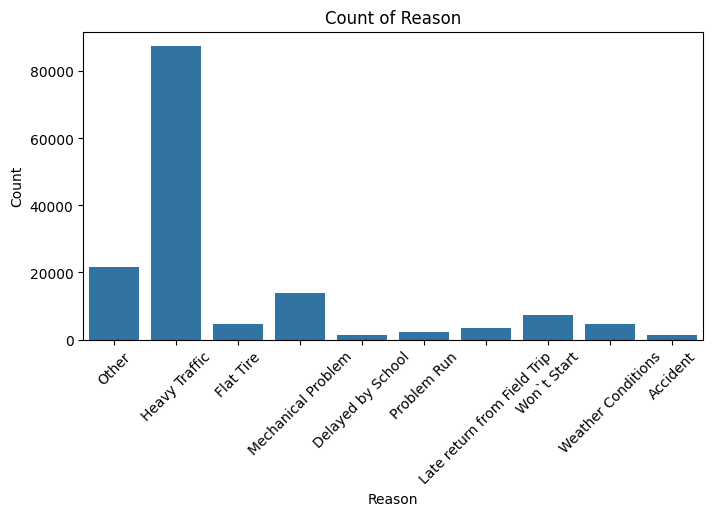

In [12]:
categorical_features = ['School_Year', 'Run_Type', 'Reason']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [13]:
# Check for missing values
df.isnull().sum()


,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [14]:
df['Run_Type'].unique()
df['Run_Type'].fillna(df['Run_Type'].mode()[0], inplace=True)

In [15]:
df['Route_Number'].unique()
df['Route_Number'].fillna(df['Route_Number'].mode()[0], inplace=True)

In [16]:
df['Reason'].unique()
df['Reason'] = df['Reason'].replace('nan', np.nan)
df['Reason'] = df['Reason'].fillna('Other')
df['Reason'] = df['Reason'].replace('Other', np.nan)
df['Reason'].fillna(df['Reason'].mode()[0], inplace=True)

In [17]:
df['Boro'].unique()
df['Boro'] = df['Boro'].replace('nan', np.nan)
df['Boro'] = df['Boro'].fillna('Bronx')
df['Boro'] = df['Boro'].replace('Bronx', np.nan)
df['Boro'].fillna(df['Boro'].mode()[0], inplace=True)

In [18]:
df['How_Long_Delayed'].unique()
df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0], inplace=True)

In [19]:
df['Incident_Number'].unique()
df['Incident_Number'].fillna(df['Incident_Number'].mode()[0], inplace=True)

In [20]:
#Check Again
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [21]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label Encoding على الأعمدة اللي فيها على عدد محدود من الفئات
label_columns = ['School_Age_or_PreK','Has_Contractor_Notified_Parents']

label_encoder = LabelEncoder()
for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding على الأعمدة اللي فيها على عدد أكبر من الفئات
one_hot_columns = ['School_Year', 'Run_Type', 'Reason', 'Bus_Company_Name', 'Schools_Serviced']

df_copy = pd.get_dummies(df, columns=one_hot_columns)
df_copy.head()


,Busbreakdown_ID,Bus_No,Route_Number,Occurred_On,Created_On,Boro,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,...,Schools_Serviced_TRIP SCHOOL,Schools_Serviced_UNITED,Schools_Serviced_VOICE CHARTER SCH NY UPPER (30577),Schools_Serviced_X093,Schools_Serviced_`,Schools_Serviced_ck,Schools_Serviced_m,Schools_Serviced_p827q,Schools_Serviced_ps 112,Schools_Serviced_q
0,1224901,811,1,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Brooklyn,10MINUTES,5,Yes,1,...,False,False,False,False,False,False,False,False,False,False
1,1225098,9302,1,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Brooklyn,25 MINUTES,3,Yes,1,...,False,False,False,False,False,False,False,False,False,False
2,1215800,358,2,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Brooklyn,15 MINUTES,12,Yes,1,...,False,False,False,False,False,False,False,False,False,False
3,1215511,331,2,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Brooklyn,10 minutes,11,Yes,1,...,False,False,False,False,False,False,False,False,False,False
4,1215828,332,2,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Brooklyn,10MINUTES,12,Yes,1,...,False,False,False,False,False,False,False,False,False,False


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [22]:
from sklearn.model_selection import train_test_split
X = df_copy.drop('Breakdown_or_Running_Late', axis=1)
y = df_copy['Breakdown_or_Running_Late']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32)

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [ ]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('bus_breakdown_ann_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?

- Data Preprocessing:
I used One-Hot Encoding and Label Encoding to convert categorical variables to numerical values, and filled missing data with the mode to retain useful information.

2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?

- Model Architecture:
The model has an input layer with 64 neurons, followed by hidden layers with 32 and 16 neurons, and a sigmoid output layer. This structure balances complexity with performance.


3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?

- Training Process:
I chose a batch size of 32 and 15 epochs to balance training speed and accuracy. These settings were tested and found effective for this dataset.


4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?


5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.

- Loss Function and Metrics:
I used binary_crossentropy as the loss function and accuracy as the metric, which is well-suited for this binary classification task.


6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?

- Model Evaluation:
Accuracy was chosen as the main metric to assess how well the model predicts delays

7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?





- Training Challenges:
I encountered a problem with RAM crashing during training. To address this, I used dropout layers to reduce overfitting, decreased the number of epochs, and switched to a GPU environment for better performance. However, the issue persisted, likely due to the large dataset size or model complexity.

### Answer Here: